In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../../data/benin-malanville.csv")  # Update path as needed

# Summary statistics
display(df.describe())

# Missing value report
missing = df.isna().sum()
missing_pct = (missing / len(df)) * 100
display(missing[missing_pct > 5])  # Columns with >5% nulls


GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

Comments    525600
dtype: int64

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../../data/benin-malanville.csv")  # Adjust the path if you're inside notebooks/

# Show basic summary statistics for numeric columns
df.describe()

# Calculate missing values and percentage
missing = df.isna().sum()
missing_pct = (missing / len(df)) * 100

# Display columns with more than 5% missing values
missing_report = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_pct
})
missing_report = missing_report[missing_report["Missing %"] > 5]

missing_report


Missing Count  Missing %
Comments         525600      100.0

In [12]:
# Make a copy of the original dataframe
df_clean = df.copy()

# Define the key columns you want to clean
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']  # adjust as needed

# Fill missing values in key columns with median
df_clean[key_cols] = df_clean[key_cols].fillna(df_clean[key_cols].median())


In [13]:
df_clean.to_csv("../../data/benin-malanville.csv", index=False)


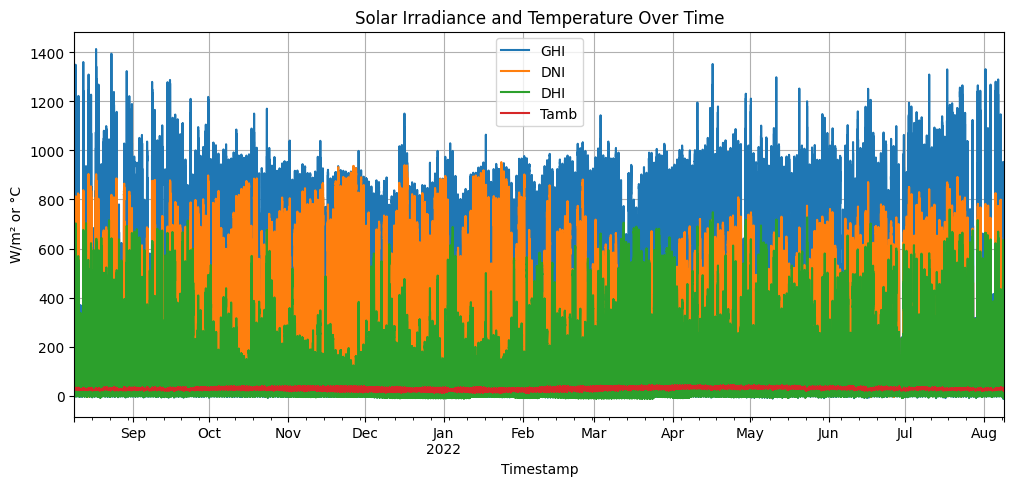

In [14]:
import matplotlib.pyplot as plt

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 5))
plt.title("Solar Irradiance and Temperature Over Time")
plt.ylabel("W/m² or °C")
plt.grid()
plt.show()


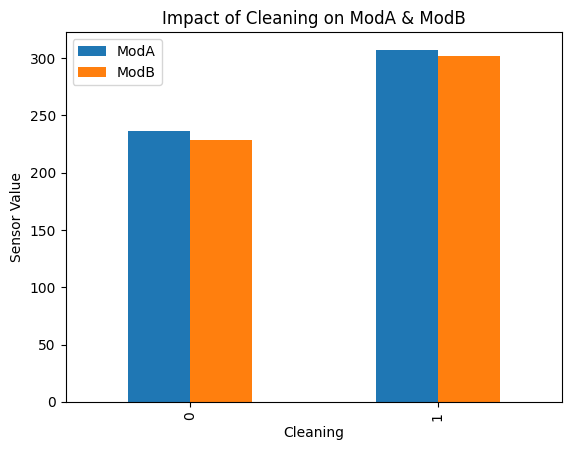

In [15]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Impact of Cleaning on ModA & ModB")
plt.ylabel("Sensor Value")
plt.show()


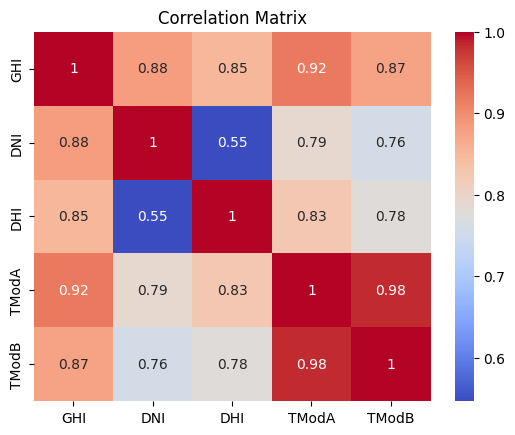

In [16]:
import seaborn as sns

corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



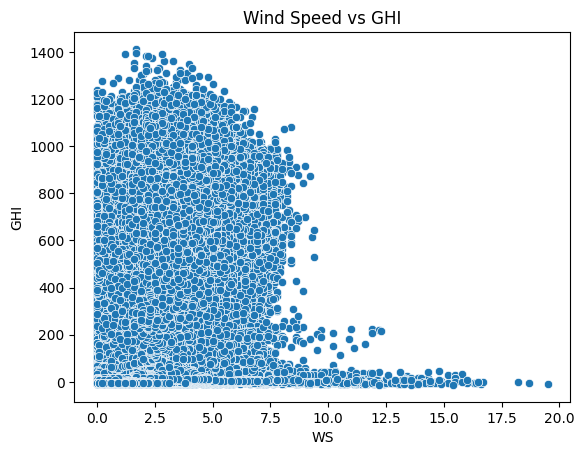

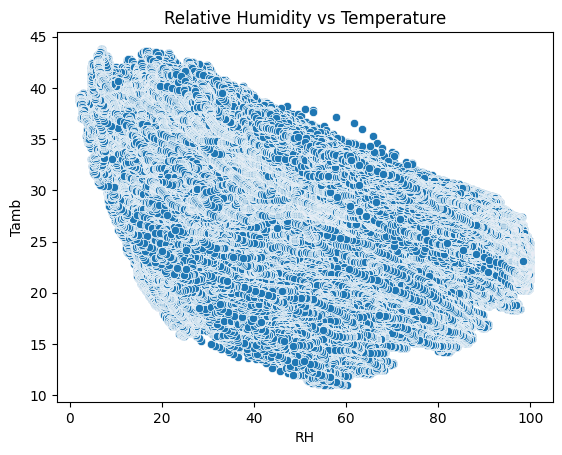

In [17]:
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title("Wind Speed vs GHI")
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("Relative Humidity vs Temperature")
plt.show()


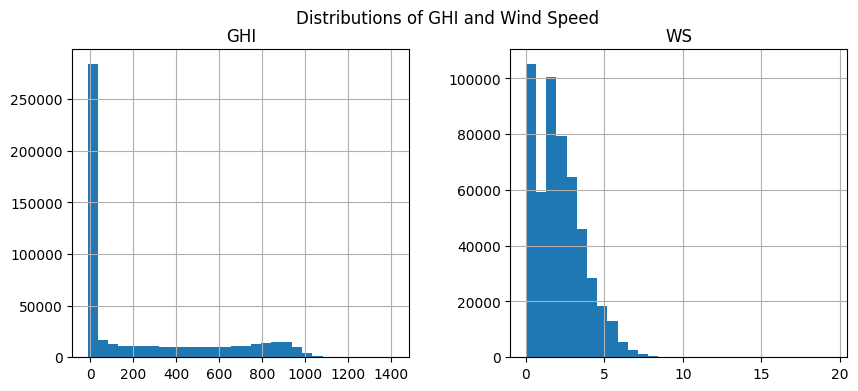

In [18]:
# Wind direction histogram
import plotly.express as px

fig = px.histogram(df_clean, x='WD', nbins=36, title="Wind Direction")
fig.show()

# GHI and Wind Speed histograms
df_clean[['GHI', 'WS']].hist(bins=30, figsize=(10, 4))
plt.suptitle("Distributions of GHI and Wind Speed")
plt.show()



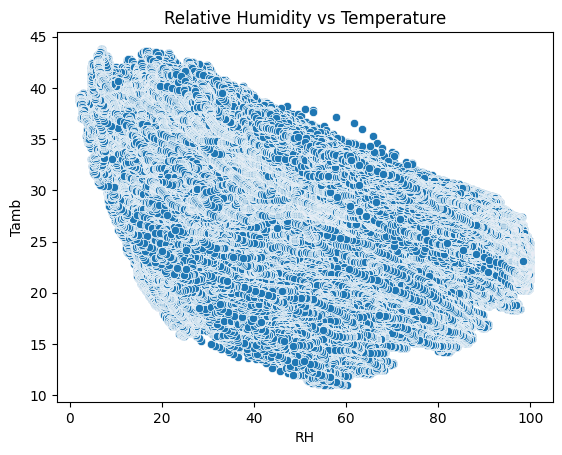

In [19]:
sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("Relative Humidity vs Temperature")
plt.show()


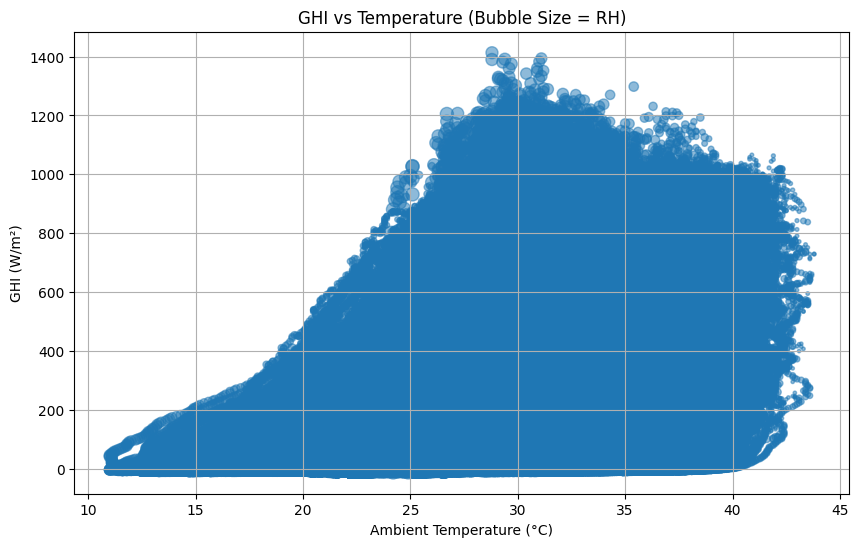

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH'], alpha=0.5)
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Temperature (Bubble Size = RH)")
plt.grid()
plt.show()
